In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm

sns.set_theme()
sns.set_style("whitegrid")
sns.set_context(
    "paper", rc={"axes.legendsize": 20, "axes.labelsize": 20, "axes.xtickssize": 20}
)

python(20063) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


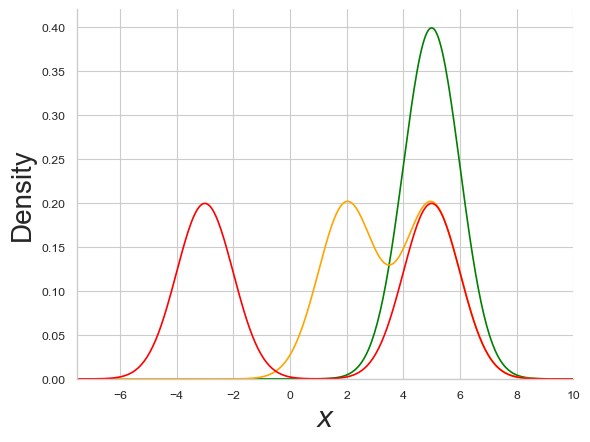

In [172]:
x = np.linspace(-10, 10, 400)
mu0 = 5

plt.plot(
    x,
    norm.pdf(x, loc=(2 * mu0 - mu0), scale=1) / 2 + norm.pdf(x, loc=mu0, scale=1) / 2,
    label=r"$X^\star_5$",
    color="green",
)

plt.plot(
    x,
    norm.pdf(x, loc=(2 * 3.5 - mu0), scale=1) / 2 + norm.pdf(x, loc=mu0, scale=1) / 2,
    label=r"$X^\star_{7/2}$",
    color="orange",
)

plt.plot(
    x,
    norm.pdf(x, loc=(2 * 1 - mu0), scale=1) / 2 + norm.pdf(x, loc=mu0, scale=1) / 2,
    label=r"$X^\star_1$",
    color="red",
)
plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)
plt.xlim(-7.5, 10)
plt.ylim(0, 0.42)
plt.xlabel(r"$x$")
plt.ylabel("Density")
plt.savefig(
    "./plots/densities_r.pdf",
    bbox_inches="tight",
    transparent=True,
)

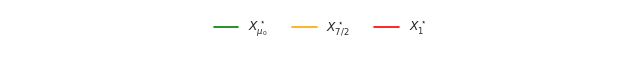

In [180]:
# Create a new figure just for the legend
plt.figure(figsize=(8, 0.5))

# Create dummy lines with the same properties as your original plots
plt.plot([], [], color="green", label=r"$X^\star_{\mu_0}$")
plt.plot([], [], color="orange", label=r"$X^\star_{7/2}$")
plt.plot([], [], color="red", label=r"$X^\star_1$")

# Configure the legend
legend = plt.legend(
    bbox_to_anchor=(0.5, 0.5),
    loc="center",
    ncol=3,  # Arrange items horizontally
    frameon=False,  # Remove the frame
    borderaxespad=0,
)

# Remove axes
plt.gca().set_axis_off()

# Save the legend
plt.savefig(
    "./plots/legend_r.pdf",
    bbox_inches="tight",
    transparent=True,
)

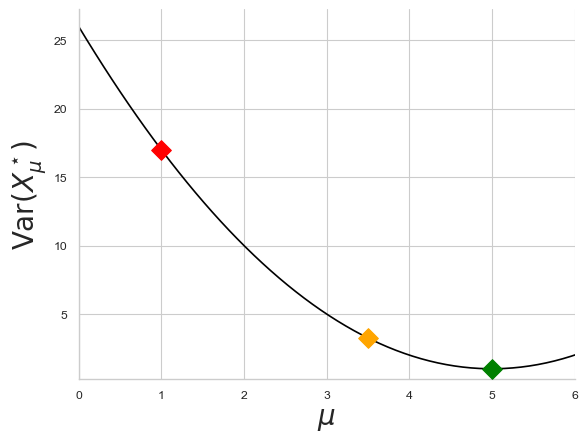

In [170]:
x = np.linspace(-10, 10, 400)
mu0 = 5

x = np.linspace(0, 2 * mu0, 100)
plt.plot(
    x,
    1 + x**2 - 2 * mu0 * x + mu0**2,
    label=r"$\text{Var}(X^\star_\mu)$",
    zorder=1,
    color="black",
)
plt.scatter(
    [1],
    [(1 + 1.0**2 - 2 * mu0 * 1.0 + mu0**2)],
    color="red",
    marker="D",
    s=100,
    zorder=10,
)
plt.scatter(
    [3.5],
    [(1 + 3.5**2 - 2 * mu0 * 3.5 + mu0**2)],
    color="orange",
    marker="D",
    s=100,
    zorder=10,
)
plt.scatter(
    [mu0],
    [1],
    color="green",
    marker="D",
    s=100,
    zorder=10,
)
plt.xlim(0, 6)
plt.ylim(0.26)
plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)
plt.grid(zorder=0)
plt.xlabel(r"$\mu$")
plt.ylabel(r"$\text{Var}(X^\star_\mu)$")
plt.savefig(
    "./plots/var_r.pdf",
    bbox_inches="tight",
    transparent=True,
)

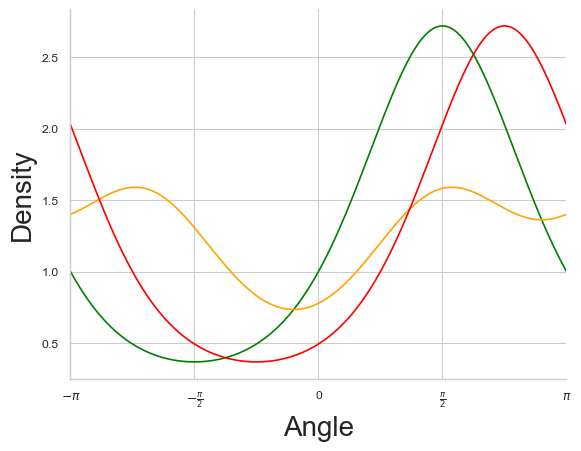

In [ ]:
def angle_diff(a, b):
    return (a - b + np.pi) % (2 * np.pi) - np.pi


x = np.linspace(-np.pi, np.pi, 400)
mu0 = np.pi / 2

plt.plot(
    x,
    np.exp(np.cos(x - mu0)),
    label=r"$X^\star_{\pi/2}$",
    color="green",
)

mirr_x = angle_diff(2 * (9 * np.pi / 10), x)
plt.plot(
    x,
    np.exp(np.cos(mirr_x - mu0)) / 2 + np.exp(np.cos(x - mu0)) / 2,
    label=r"$X^\star_{9\pi/10}$",
    color="orange",
)

mirr_x = angle_diff(2 * (-3 * np.pi / 8), x)
plt.plot(
    x,
    np.exp(np.cos(mirr_x - mu0)),
    label=r"$X^\star_{-3\pi/8}$",
    color="red",
)
plt.xlabel("Angle")
plt.xticks(
    np.linspace(-np.pi, np.pi, 5),
    [r"$-\pi$", r"$-\frac{\pi}{2}$"] + ["0"] + [r"$\frac{\pi}{2}$", r"$\pi$"],
)
plt.xlim(-np.pi, np.pi)
plt.ylabel("Density")
plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)
plt.savefig(
    "./plots/densities_circle.pdf",
    bbox_inches="tight",
    transparent=True,
)

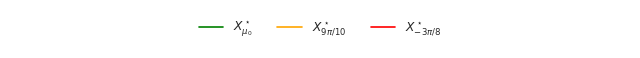

In [181]:
# Create a new figure just for the legend
plt.figure(figsize=(8, 0.5))

# Create dummy lines with the same properties as your original plots
plt.plot([], [], color="green", label=r"$X^\star_{\mu_0}$")
plt.plot([], [], color="orange", label=r"$X^\star_{9\pi/10}$")
plt.plot([], [], color="red", label=r"$X^\star_{-3\pi/8}$")


# Configure the legend
legend = plt.legend(
    bbox_to_anchor=(0.5, 0.5),
    loc="center",
    ncol=3,  # Arrange items horizontally
    frameon=False,  # Remove the frame
    borderaxespad=0,
)

# Remove axes
plt.gca().set_axis_off()

# Save the legend
plt.savefig(
    "./plots/legend_circle.pdf",
    bbox_inches="tight",
    transparent=True,
)

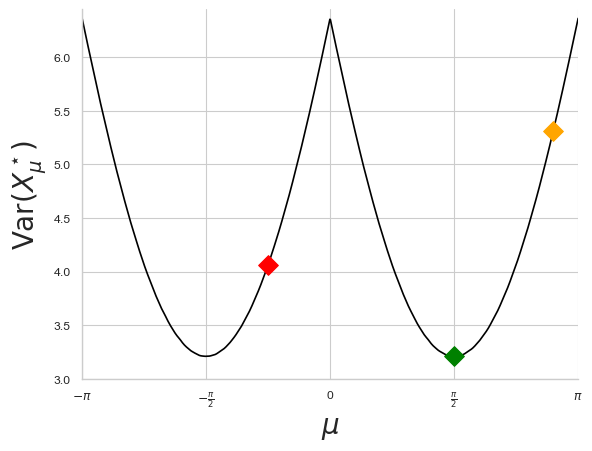

In [168]:
import numpy as np
from scipy.integrate import fixed_quad
from scipy.special import i0

C = 2 * np.pi * i0(1)


# E[d(X, p)^2] for X ~ VM(q, 1)
def vm_ff(p, q):
    def von_mises_density(theta):
        return np.exp(np.cos(theta - q)) / C

    def integrand(theta):
        inner_product = np.cos(p) * np.cos(theta) + np.sin(p) * np.sin(theta)
        inner_product = np.clip(inner_product, -1, 1)
        return np.arccos(inner_product) ** 2 * von_mises_density(theta)

    # Integrate over [0, 2π]
    result, error = fixed_quad(integrand, 0, 2 * np.pi, n=50)
    return result


# FM of the mixture of VM(p, 1) and VM(2q - p, 1)
def fm(p, q, x_vals):
    vals = [vm_ff(x, 2 * q - p) + vm_ff(x, p) for x in x_vals]
    min_idx = np.argmin(vals)
    return x_vals[min_idx], vals[min_idx]


x_vals = np.linspace(-np.pi, np.pi, 100)
x_fine = np.linspace(-np.pi, np.pi, 1000)
# variances = [fm(mu0, mu1, x_vals=x_vals)[1] for mu1 in x_fine]

plt.scatter(
    [-np.pi / 4],
    [fm(mu0, -np.pi / 4, x_vals=x_vals)[1]],
    color="red",
    marker="D",
    s=100,
    zorder=10,
)
plt.scatter(
    [9 * np.pi / 10],
    [fm(mu0, 9 * np.pi / 10, x_vals=x_vals)[1]],
    color="orange",
    marker="D",
    s=100,
    zorder=10,
)
plt.scatter(
    [mu0],
    [fm(mu0, mu0, x_vals=x_vals)[1]],
    color="green",
    marker="D",
    s=100,
    zorder=10,
)

plt.plot(
    x_fine,
    variances,
    color="black",
)
plt.xticks(
    np.linspace(-np.pi, np.pi, 5),
    [r"$-\pi$", r"$-\frac{\pi}{2}$"] + ["0"] + [r"$\frac{\pi}{2}$", r"$\pi$"],
)
plt.xlabel(r"$\mu$")
plt.xlim(-np.pi, np.pi)
plt.ylabel(r"$\text{Var}(X^\star_\mu)$")
plt.ylim(3, 6.45)
plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)
plt.savefig(
    "./plots/var_circle.pdf",
    bbox_inches="tight",
    transparent=True,
)

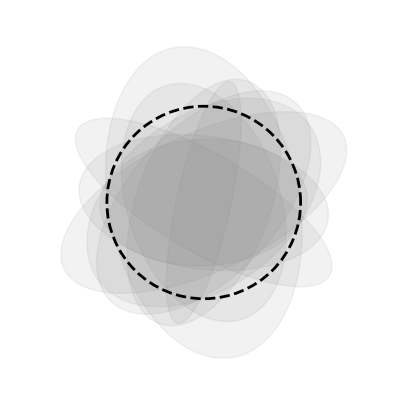

In [33]:
from bures_wasserstein import BuresWasserstein as BW, sym
import jax
import jax.numpy as jnp


def sample(key, n, mu):
    A = jnp.sqrt(0.1) * jax.random.normal(key, (n, mu.shape[0], mu.shape[0]))
    return jax.vmap(lambda A: BW.exp(mu, sym(A)))(A)


def plot_cov_ellipse(cov, pos, nstd=2.0, **kwargs):
    from matplotlib.patches import Ellipse

    ax = plt.gca()
    vals, vecs = np.linalg.eigh(cov)
    order = vals.argsort()[::-1]
    vals, vecs = vals[order], vecs[:, order]
    theta = np.degrees(np.arctan2(*vecs[:, 0][::-1]))
    width, height = 2 * nstd * np.sqrt(vals)
    ax.add_patch(Ellipse(xy=pos, width=width, height=height, angle=theta, **kwargs))


mu_0 = jnp.eye(2)

key = jax.random.PRNGKey(0)
samples = sample(key, 20, mu_0)
plt.figure(figsize=(5, 5))
plt.xlim(-1, 1)
plt.ylim(-1, 1)
plt.grid(False)
plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)
plt.gca().spines["left"].set_visible(False)
plt.gca().spines["bottom"].set_visible(False)
plt.xticks([])
plt.yticks([])
for i in range(10):
    plot_cov_ellipse(
        samples[i],
        [0, 0],
        edgecolor="grey",
        facecolor="gray",
        alpha=0.1,
        lw=1,
        nstd=0.5,
    )
plot_cov_ellipse(
    mu_0, [0, 0], linestyle="--", edgecolor="black", facecolor="none", lw=2, nstd=0.5
)
plt.savefig(
    "./plots/sample_bw.pdf",
    bbox_inches="tight",
    transparent=True,
)

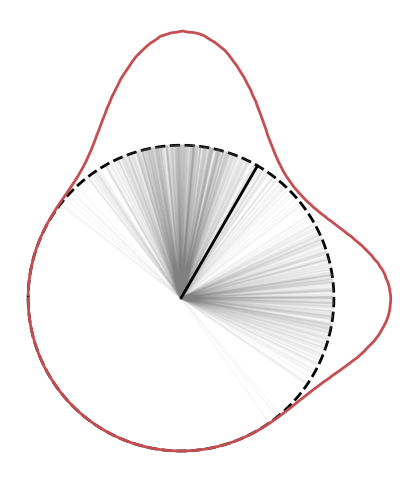

In [ ]:
from sphere import Sphere as S, proj_comp
from manifold import geodesic


def mixture(key, x0, x1, p):
    num_dims = len(x0.shape) - 1
    shape = (x0.shape[0], *[1 for _ in range(num_dims)])
    z = jax.random.choice(
        key, jnp.array([0.0, 1.0]), shape=shape, p=jnp.array([p, 1 - p])
    )
    return z * x0 + (1.0 - z) * x1


def sample_von_mises(key, n, mu):
    vs = 0.3 * jax.random.normal(key, (n, mu.shape[0]))
    return jax.vmap(lambda v: S.exp(mu, proj_comp(mu, v)))(vs)


def sample_mixture(key, n, mu0, mu1, p):
    key_z, key_x0, key_x1 = jax.random.split(key, 3)
    x0 = sample_von_mises(key_x0, n, mu0)
    x1 = sample_von_mises(key_x1, n, mu1)
    return mixture(key_z, x0, x1, p)


mix_mu_0 = jnp.array([0.0, 1.0])
mix_mu_1 = jnp.array([1.0, 0.0])
p = 1 / 3
mu_0 = geodesic(S, mix_mu_0, mix_mu_1, p)

s = 0.5

x = sample_mixture(
    jax.random.PRNGKey(np.random.randint(0, 2**32)), 1000, mix_mu_0, mix_mu_1, p
)

xhat = S.frechet_mean(x, None)

data = sample_mixture(
    jax.random.PRNGKey(np.random.randint(0, 2**32)), 10000000, mix_mu_0, mix_mu_1, p
)
data = np.arctan2(data[:, 1], data[:, 0])
theta = np.linspace(-np.pi, np.pi, 300)
counts, _ = np.histogram(data, bins=theta)

density = counts / counts.sum() * 40

circle_x = np.cos(theta) * s
circle_y = np.sin(theta) * s
density_x = (1 + density) * np.cos(theta[:-1]) * s
density_y = (1 + density) * np.sin(theta[:-1]) * s


fig, ax = plt.subplots(figsize=(6, 6))
plt.grid(False)
plt.plot(circle_x, circle_y, "--", linewidth=2, color="black", zorder=0)
plt.plot(density_x, density_y, "r-", linewidth=2, label="Density", zorder=0, alpha=1)

for i in range(x.shape[0]):
    plt.plot([0, s * x[i, 0]], [0, s * x[i, 1]], color="grey", zorder=1, alpha=0.05)

plt.plot([0, s * mu_0[0]], [0, s * mu_0[1]], color="black", zorder=1, linewidth=2)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["left"].set_visible(False)
ax.spines["bottom"].set_visible(False)
plt.xticks([])
plt.yticks([])
ax.set_aspect("equal")
plt.savefig(
    "./plots/sample_circle_mix.pdf",
    bbox_inches="tight",
    transparent=True,
)

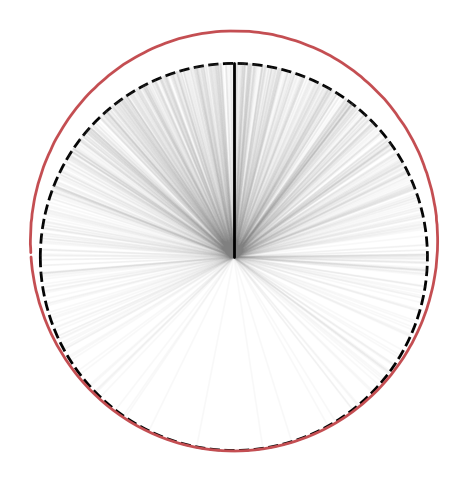

In [101]:
def sample_von_mises(key, n, mu):
    vs = jax.random.normal(key, (n, mu.shape[0]))
    return jax.vmap(lambda v: S.exp(mu, proj_comp(mu, v)))(vs)


data = sample_mixture(
    jax.random.PRNGKey(np.random.randint(0, 2**32)), 10000000, mix_mu_0, mix_mu_1, 0
)
data = np.arctan2(data[:, 1], data[:, 0])
theta = np.linspace(-np.pi, np.pi, 300)
counts, _ = np.histogram(data, bins=theta)

density = counts / counts.sum() * 20

circle_x = np.cos(theta) * s
circle_y = np.sin(theta) * s
density_x = (1 + density) * np.cos(theta[:-1]) * s
density_y = (1 + density) * np.sin(theta[:-1]) * s

fig, ax = plt.subplots(figsize=(6, 6))
plt.grid(False)
plt.plot(circle_x, circle_y, "--", linewidth=2, color="black", zorder=0)
plt.plot(density_x, density_y, "r-", linewidth=2, label="Density", zorder=0, alpha=1)

x = sample_mixture(
    jax.random.PRNGKey(np.random.randint(0, 2**32)), 1000, mix_mu_0, mix_mu_1, 0
)

for i in range(x.shape[0]):
    plt.plot([0, s * x[i, 0]], [0, s * x[i, 1]], color="grey", zorder=1, alpha=0.05)

plt.plot(
    [0, s * mix_mu_0[0]], [0, s * mix_mu_0[1]], color="black", zorder=1, linewidth=2
)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["left"].set_visible(False)
ax.spines["bottom"].set_visible(False)
plt.xticks([])
plt.yticks([])
ax.set_aspect("equal")
# plt.savefig(
#     "./plots/sample_circle.pdf",
#     bbox_inches="tight",
#     transparent=True,
# )